# Pymaceuticals Analysis
For this analysis, data for mice identity and study results were provided. 
Datasets were merged and duplicates were removed to highlight 248 mice that were part of the testing. 

From the study, below are three observations:

1) There were more male mice used in the study than female, with 51% falling in the male category.
2) Capomulin was the most used drug regimen in this study. There is a strong correlation between mouse weight and the average tumor volume of 0.84 for mice that used the Capomulin drug regimen. 
3) Ketapril had the highest mean tumor volume among the drug regimens with a mean of 55.24.  


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
from scipy.stats import linregress

In [32]:
# Load and read csv data files
mouse_data = Path("data/Mouse_metadata.csv")
mouse_df= pd.read_csv(mouse_data)
study_results = Path("data/Study_results.csv")
study_df= pd.read_csv(study_results)

In [33]:
# Merge two data frames together
combined_data = pd.merge(study_df, mouse_df, how='left',on='Mouse ID')
combined_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1893 rows x 8 columns]

In [34]:
#number of unique mice
mice_num = len(combined_data['Mouse ID'].unique())
mice_num

249

In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#duplicate = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint'])].unique()
duplicate = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [36]:
duplicate_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Source: https://www.activestate.com/resources/quick-reads/how-to-delete-a-column-row-from-a-dataframe/
#Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
clean_data = combined_data.drop(combined_data.index[(combined_data["Mouse ID"] == "g989")],axis=0,inplace=False)
clean_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [38]:
# Checking the number of mice in the clean DataFrame.
mice_num_new = len(clean_data['Mouse ID'].unique())
mice_num_new

248

# Summary Statistics


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_var = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_std = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_sem = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [40]:
per_school_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                   "Median Tumor Volume": median_tumor_volume,
                                   "Tumor Volume Variance": tumor_volume_var,
                                   "Tumor Volume Std. Dev.": tumor_volume_std,
                                   "Tumor Volume Std. Err.":tumor_volume_sem
                                  })
per_school_summary

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [41]:
# Using the aggregation method, produce the same summary statistics in a single line
#source: https://stackoverflow.com/questions/62980092/pandas-aggregate-of-dataframegroupby
tumor_volume_agg = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([np.mean, np.median,np.var,np.std,st.sem])
tumor_volume_agg

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts# 

<Axes: xlabel='Drug Regimen', ylabel='# of Observe Mouse Timepoints'>

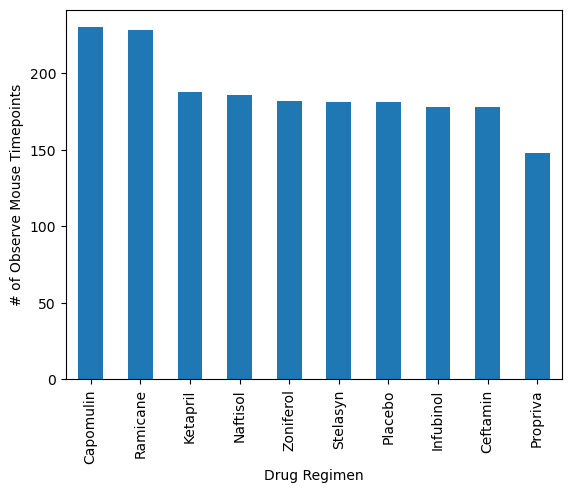

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#source: https://dataindependent.com/pandas/pandas-bar-plot-dataframe-plot-bar/
totals = clean_data["Drug Regimen"].value_counts()
totals.plot.bar(xlabel='Drug Regimen', ylabel='# of Observe Mouse Timepoints', rot=90)

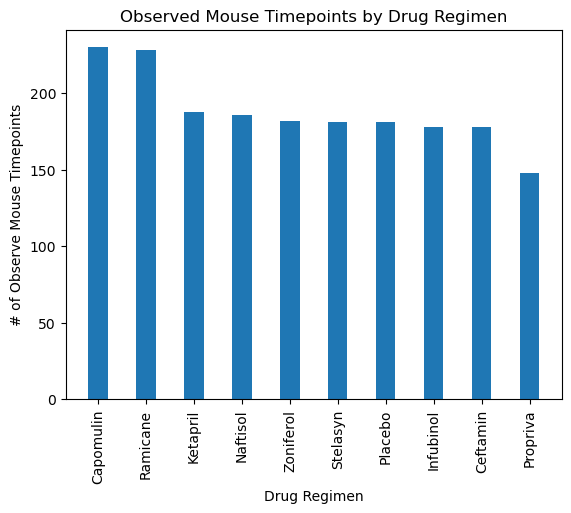

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen = totals.keys()
regimen_count = []
for i in range(len(regimen)):
    #print(regimen[i])
    #print(totals[regimen[i]])
    regimen_count.append(totals[regimen[i]])
    
plt.bar(regimen, regimen_count, width=0.4)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observe Mouse Timepoints")
plt.title("Observed Mouse Timepoints by Drug Regimen")
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='Mice Gender'>

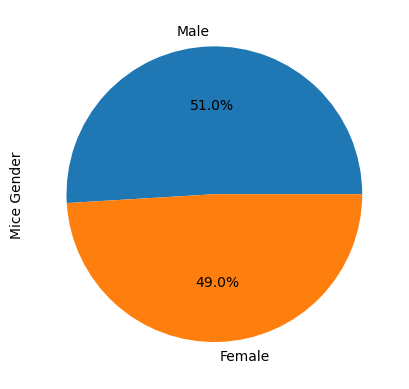

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data= clean_data["Sex"].value_counts()
gender_data.plot.pie(xlabel='Mice Gender', ylabel='Mice Gender', rot=90, autopct="%1.1f%%")


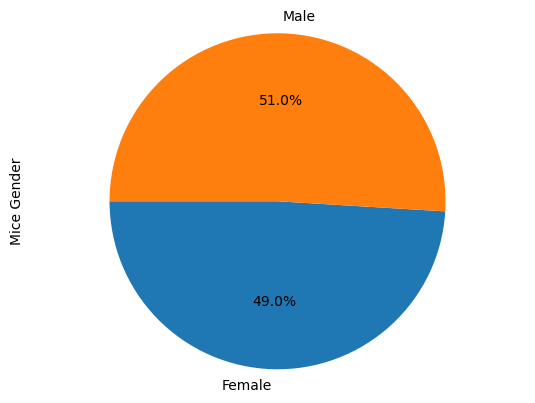

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_count = len(clean_data.loc[clean_data["Sex"] == "Male"].value_counts())
female_count =len(clean_data.loc[clean_data["Sex"] == "Female"].value_counts())

labels = ["Female","Male"]
count = [female_count,male_count]
plt.pie(count, labels=labels, autopct="%1.1f%%", shadow=False, startangle=180)
plt.ylabel("Mice Gender")
plt.axis("equal")
plt.show()


# Quartiles, Outliers and Boxplots# 

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#source to reset: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
max_data = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
max_data = max_data.reset_index()
max_data
    
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_clean_data = pd.merge(max_data, clean_data, how='left',on= ['Mouse ID','Timepoint'])
new_clean_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

([<matplotlib.axis.XTick at 0x14a820310>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

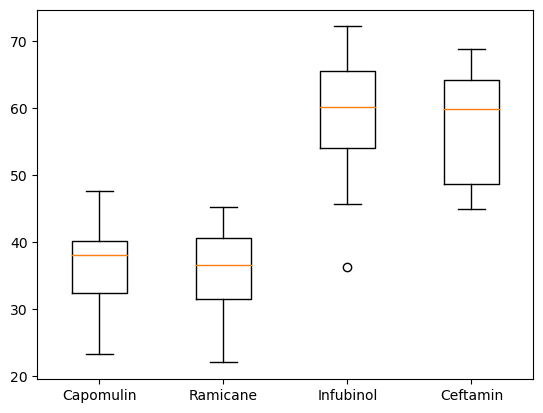

In [47]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
#source: https://matplotlib.org/stable/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py
drug_list= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol =[]

for drug in drug_list:
    data = []
    for i in range(len(new_clean_data)):
        if new_clean_data['Drug Regimen'][i] == drug:
            data.append(new_clean_data['Tumor Volume (mm3)'][i])
    
    tumor_vol.append(data)
    
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.    
plt.boxplot(tumor_vol)  
plt.xticks([1,2,3,4],labels=drug_list)    


###Note to grader: Unfortunately I was not able to complete this portion of the assignment, I will work on this and resubmit at a later date. 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#quartiles = tumor_vol.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq


# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset 

# Determine outliers using upper and lower bounds
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)


# Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

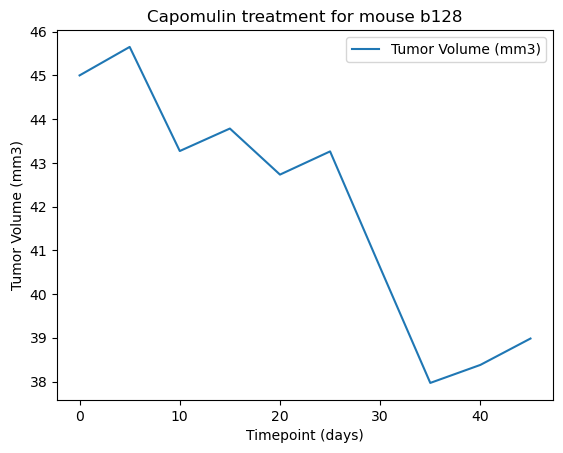

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#source: https://www.geeksforgeeks.org/time-series-plot-or-line-plot-with-pandas/
#I picked b128 as the mouse of choice, referencing combined_data output for a mouse associated to Capomulin treatment
mouse_data = clean_data.loc[combined_data["Mouse ID"] == "b128"]
mouse_data.plot('Timepoint','Tumor Volume (mm3)')

plt.title("Capomulin treatment for mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

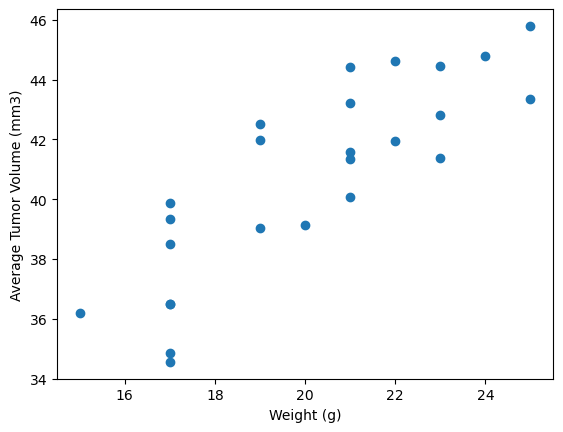

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_regimen = clean_data.loc[clean_data["Drug Regimen"] == 'Capomulin']
capomulin_avg = capomulin_regimen.groupby(['Mouse ID'])[['Tumor Volume (mm3)','Weight (g)']].mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
#plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


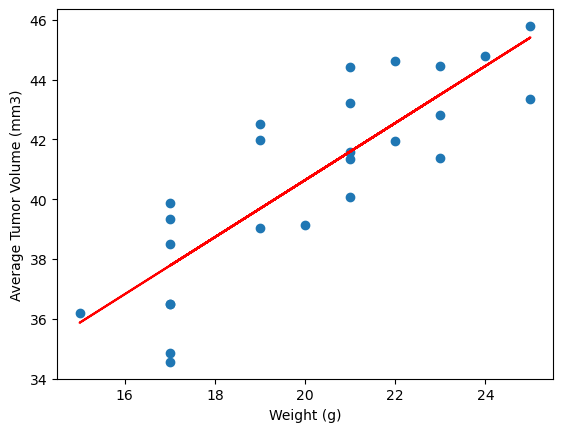

In [50]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_regimen = clean_data.loc[clean_data["Drug Regimen"] == 'Capomulin']
capomulin_avg = capomulin_regimen.groupby(['Mouse ID'])[['Tumor Volume (mm3)','Weight (g)']].mean()

x_values =capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.0,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()